In [13]:
import xarray as xr 
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.lines as mlines
import numpy as np
from matplotlib import ticker
import math

In [14]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [32]:
def plot_sims(sim_array, axes, colour, cmap, alpha, markersize, norm=None, annotate=None, highlight=None, sst=None):
    for key, val in  axes.items():
        if 'baut' in key:
            transform = [10**x for x in sim_array[:, val[1]]]
            #transform = [10**x for x in sim_array[:]]
            c_obj = val[2].scatter(sim_array[:, val[0]], transform, c=colour, cmap=cmap, alpha=alpha, s=markersize, norm=norm)
            if highlight != None:
                val[2].scatter(sim_array[highlight, val[0]], transform[highlight], facecolors='None', edgecolors='hotpink', s=markersize+150, lw=4)
            #if key=='nabaut':
            if annotate==True:
                for i in range(len(sim_array)):
                    val[2].annotate(i, (sim_array[:, val[0]][i],  transform[i]), fontsize=6)
        else:
            c_obj = val[2].scatter(sim_array[:, val[0]], sim_array[:, val[1]], c=colour, cmap=cmap, alpha=alpha, s=markersize, norm=norm)
            if highlight != None:
                val[2].scatter(sim_array[highlight, val[0]], sim_array[highlight, val[1]], facecolors='None', edgecolors='hotpink', s=markersize+150, lw=4)
            #if annotate==True:
            #    for i in range(len(sim_array)):
            #        val[2].annotate(i, (sim_array[:, val[0]][i],  sim_array[:, val[1]]), fontsize=6)
                
        val[2].set_xticks(val[8])
        val[2].set_yticks(val[9])
        val[2].set_yticklabels(val[9])
        
        #val[2].set_xlim(val[3])
        #val[2].set_ylim(val[4])
        val[2].set_xlabel(val[6])
        val[2].set_ylabel(val[7])
        val[2].xaxis.set_visible(val[5][0])
        val[2].yaxis.set_visible(val[5][1])
        
        if key in ['qv_blinv', 'invdelt', 'deltdelq', 'delqna', 'nabaut']:
            val[2].set_title(val[6], pad=-100)
            val[2].xaxis.set_visible(True)
            val[2].yaxis.set_visible(True)
            if key=='nabaut':
                val[2].tick_params(labeltop=True, top=True, labelright=True, right=True, labelleft=False, left=False)
                val[2].set_ylabel('')
            elif key=='qv_blinv':
                val[2].set_title(val[6])
                val[2].tick_params(labeltop=True, top=True, labelbottom=False, bottom=False, labelright=True, right=True, labelleft=True, left=True)
                val[2].set_xlabel('')
            else:
                val[2].tick_params(labeltop=True, top=True, labelbottom=False, bottom=False, labelright=True, right=True, labelleft=False, left=False)
                val[2].set_xlabel('')
                val[2].set_ylabel('')
            #if key=='invdelt':
                #val[2].tick_params(pad=500)
                #val[2].xaxis.major_ticklabels.set_ha("left")
            #for label in val[2].get_xticklabels():
        xlabels = val[2].get_xticklabels()
        xlabels[0].set_horizontalalignment('left')
        xlabels[-1].set_horizontalalignment('right')
        
        ylabels = val[2].get_yticklabels()
        ylabels[0].set_verticalalignment('bottom')
        ylabels[-1].set_verticalalignment('top')

    if c_obj:
        return c_obj
        
def pairwise(regions, colour=None, cmap=None, norm=None, clabel=None, annotate=None, highlight=None, lh_design=None):
    print(len(regions[0]))
    fig = plt.figure(figsize=(15,15))
    gs = GridSpec(6,6,left=0.07,bottom=0.05,top=0.98,right=0.97,hspace=0.04,wspace=0.04) 

    axes = {}
    q_names = p_names[:]
    for i in range(len(q_names[:-1])):
        for j, j_name in enumerate(q_names[:-1]): 
            x=True if i==0 else False
            y=True if j==0 else False
            axes[f'{j_name}{q_names[-1]}'] = [j, 5-i, fig.add_subplot(gs[5-i,j]), ax_names[j], ax_names[5-i], (x,y), p_labels[j], p_labels[5-i], x_positions[j], y_positions[5-i]]
        q_names.remove(q_names[-1])

    #for i,name in enumerate(p_labels):
    #    fig.text(0.12+i*0.155,0.89-i*0.154,name,fontsize=25,ha='center', va='center')
    for i,name in enumerate(p_labels[1:]):
        fig.text(0.25+i*0.152,0.755-i*0.157,name,fontsize=MEDIUM_SIZE,ha='center', va='center',rotation=270)
#     for i,name in enumerate(p_labels[1:-1]):
#         fig.text(0.28+i*0.154,0.75-i*0.157,name,fontsize=MEDIUM_SIZE,ha='center', va='center',rotation=315)
        
    #fig.text(0.85,0.115,p_labels[-1],fontsize=MEDIUM_SIZE,ha='center', va='center',rotation=270)

    for a,b in enumerate([500,2,-7,10,0.0051]):
        fig.text(0.064,0.68-a*0.156,str(b),fontsize=SMALL_SIZE,ha='right', va='center')
    fig.text(0.825,0.68-4*0.156,str(0.0051),fontsize=SMALL_SIZE,ha='left', va='center')
    
    plot_sims(lh_design, axes, "black", None,0.2, 10, annotate=annotate)
    markersize = 150
    if len(regions)>1:
        for region,c in zip(regions, ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']):
            plot_sims(region, axes,c,cmap,1,markersize)
    else:
        if colour is None:
            plot_sims(regions[0], axes,"C0",cmap,1,markersize,norm=None, annotate=None)
        else:
            c_obj = plot_sims(regions[0], axes,colour,cmap,1,markersize,norm, annotate=None, highlight=highlight)
            cax = plt.axes([0.38, 0.795, 0.45, 0.03])
            fig.colorbar(c_obj, label=clabel, cax=cax, orientation='horizontal')
    #plot_sims(design_discard, axes, "black", 0.2, 40, annotate=annotate)
    #return c_obj

In [16]:
def find_cf_region(design, condition, cf_ind=None):
    ind_keep = []
    cf_keep = []
    for i in range(len(design)):
        cf = np.loadtxt(f"/home/users/eers/sct/lwp_mask_csvs/sct_em{i}_cloud_frac.csv", delimiter=',', skiprows=1)
        if condition(cf):
            ind_keep.append(i)
            if cf_ind is not None:
                cf_keep.append(cf[cf_ind])
    
    design_keep = np.take(design, ind_keep, 0)
    return design_keep, cf_keep

def find_cf_region_time(design, condition):
    ind_keep = []
    time = []
    for i in range(len(design)):
        cf = np.loadtxt(f"/home/users/eers/sct/lwp_mask_csvs/sct_em{i}_cloud_frac.csv", delimiter=',', skiprows=1)
        times = np.loadtxt(f"/home/users/eers/sct/lwp_mask_csvs/sct_em{i}_times.csv", delimiter=',', skiprows=1)
        if condition(cf):
            ind_keep.append(i)
            indices, = np.where(cf[10:] < 0.55)  # only search for cf<0.55 after the first night. Could make this more specific. 
            if len(indices)!=0:
                time.append(times[indices[0]])
            else:
                time.append(80)
    
    design_keep = np.take(design, ind_keep, 0)
    return design_keep, time

def find_blz_region(design, condition, val_ind=None):
    ind_keep = []
    val_keep = []
    for i in range(len(design)):
        csv = np.loadtxt(f"/home/users/eers/sct/lwp_mask_csvs/sct_em{i}_inv_height.csv", delimiter=',', skiprows=1)
        if condition(csv):
            ind_keep.append(i)
            if val_ind is not None:
                val_keep.append(csv[val_ind])
    
    design_keep = np.take(design, ind_keep, 0)
    return design_keep, val_keep

In [17]:
# Calculated separately in create_output now. But here's the original code for playing with the robustness of the CF thresholds or 0.9 and 0.5
# retired on 28th June

def find_cf_region_time2(design, condition, design_type):
    ind_keep = []
    ind_discard = []
    time = []
    for i in range(len(design)):
        cf = np.loadtxt(f"/home/users/eers/sct/lwp_mask_csvs/sct_{design_type}{i}_cloud_frac.csv", delimiter=',', skiprows=1) # skip spin up
        times = np.loadtxt(f"/home/users/eers/sct/lwp_mask_csvs/sct_{design_type}{i}_times.csv", delimiter=',', skiprows=1) # skip spin up
        if condition(cf):
#             ind_keep.append(i)          
            sc, = np.where(cf > 0.9)  # find and save the indices where the CF is over 0.8
            cu, = np.where(cf[sc[0]:] < 0.5) # find and save the indices after the CF reaches 0.8 where it then falls below 0.5
            #cu, = np.where(cf[np.argmax(cf[sc[0]:]):] < 0.55) # find and save the indices after the CF reaches maximum AFTER 0.8 where it then falls below 0.5 - not a good idea, don't use, see notes
            if len(cu)!=0 and all(cf[sc[0]+cu[0]:] < 0.9):
                ind_keep.append(i)
                time.append(times[sc[0]+cu[0]] - times[sc[0]])
            else:
                if len(cu)!=0:
                    print(i)
                ind_keep.append(i)
                time.append(80)
        else:
            ind_discard.append(i)
            #ind_keep.append(i)
            #time.append(-1)
    
    design_keep = np.take(design, ind_keep, 0)
    return design_keep, time, ind_keep,ind_discard



In [18]:
def get_region(ensemble, output, design, cut):
    full_time = np.loadtxt(f'/home/users/eers/sct/output_data/sct_{ensemble}_{output}.csv', delimiter=',')
    full_time[:,:-1] = design
    
    if cut == 'full':
        region = full_time
    elif cut == 'valid':
        region = full_time[np.argwhere(full_time[:,-1] > 0)[:,0]]
    elif cut =='no80s':
        region = full_time[np.argwhere(full_time[:,-1] < 80)[:,0]]
    elif cut == 'intersect':
        region = full_time[np.intersect1d(np.argwhere(full_time[:,-1] > 0)[:,0], np.argwhere(full_time[:,-1] < 80)[:,0])]
    else:
        print('Select a cut for region.')
    return region

def select_cf_region(values, output, cut, show_design):
    if values == 'original':
        design_em = np.loadtxt("/home/users/eers/sct/lh_design/SCT_EmulatorInputsDesign.csv", delimiter=',', skiprows=1)
        design_val = np.loadtxt("/home/users/eers/sct/lh_design/SCT_ValidationInputsDesign.csv", delimiter=',', skiprows=1)
    elif values == 'spin':
        design_em = np.loadtxt("/home/users/eers/sct/lh_design/post_spinupvalues/ppe_post_spinup.csv", delimiter=',')
        design_val = np.loadtxt("/home/users/eers/sct/lh_design/post_spinupvalues/val_post_spinup.csv", delimiter=',')
        
    if show_design == 'em':
        design = design_em
        region = get_region('em', output, design, cut)
    elif show_design == 'val':
        design = design_val
        region = get_region('val', output, design, cut)
    elif show_design == 'all':
        design = np.concatenate([design_em, design_val], axis=0)
        region = np.concatenate([get_region('em', output, design_em, cut), get_region('val', output, design_val, cut)], axis=0)
        
    # if statement to take out rows where bl z is greater than 1500
    if values=='spin':      
        design_em = design_em[design_em[:,1] < 1500]
        region = region[region[:,1] < 1500]
        
    return region, design_em


In [ ]:
#design = np.loadtxt("/home/users/eers/sct/lh_design_600.csv", delimiter=',', skiprows=1)
design = np.loadtxt("/home/users/eers/sct/lh_design_600_noise_var.csv", delimiter=',', skiprows=1)
pred = np.loadtxt("/home/users/eers/sct/lh_pred_600_noise_var.csv", delimiter=',', skiprows=1)

p_names = ['qv_bl','inv','delt','delq','na','baut']
p_labels = ['$BL~q_{v}$', '$BL~z$', r'$\Delta~\theta$', '$\Delta~q_{v}$', '$BL~N_{a}$', '10^{$b_{aut}$}']
ax_names = [(min(design[:,0]), max(design[:,0])), (min(design[:,1]), max(design[:,1])), (min(design[:,2]), max(design[:,2])), (min(design[:,3]), max(design[:,3])), 
            (min(design[:,4]), max(design[:,4])), (10**min(design[:,5]), 10**max(design[:,5]))]
x_positions = ax_names
#x_positions = [[7,11],[500, 1300],[2,21],[-7,-1],[10,500],[0.0051,0.05]]
y_positions = [[11],[1300],[21],[-1],[500],[0.05]]

#pairwise([design], pred[:,1], plt.Normalize(10, 70)) # mean
#pairwise([design], colour=(pred[:,2])) #std
pairwise([design], (pred[:,4]-pred[:,3]), plt.Normalize(10, 70)) # upper95 - lower95 

plt.savefig("/home/users/eers/sct/analysis_plots/pairwise_transition_time_lhpred_ul95_600_noise_var.png",facecolor='white')

In [20]:
p_names = ['qv_bl','inv','delt','delq','na','baut']
p_labels = ['$BL~q_{v}$', '$BL~z$', r'$\Delta~\theta$', '$\Delta~q_{v}$', '$BL~N_{a}$', '10^{$b_{aut}$}']
ax_names = [(7, 11), (500, 1300), (2, 21), (-7, -1), (10, 500), (10**(-2.3), 10**(-1.3))]
x_positions = [[7,11],[500, 1300],[2,21],[-7,-1],[10,500],[0.0051,0.05]]
y_positions = [[11],[1300],[21],[-1],[500],[0.05]]

85
50


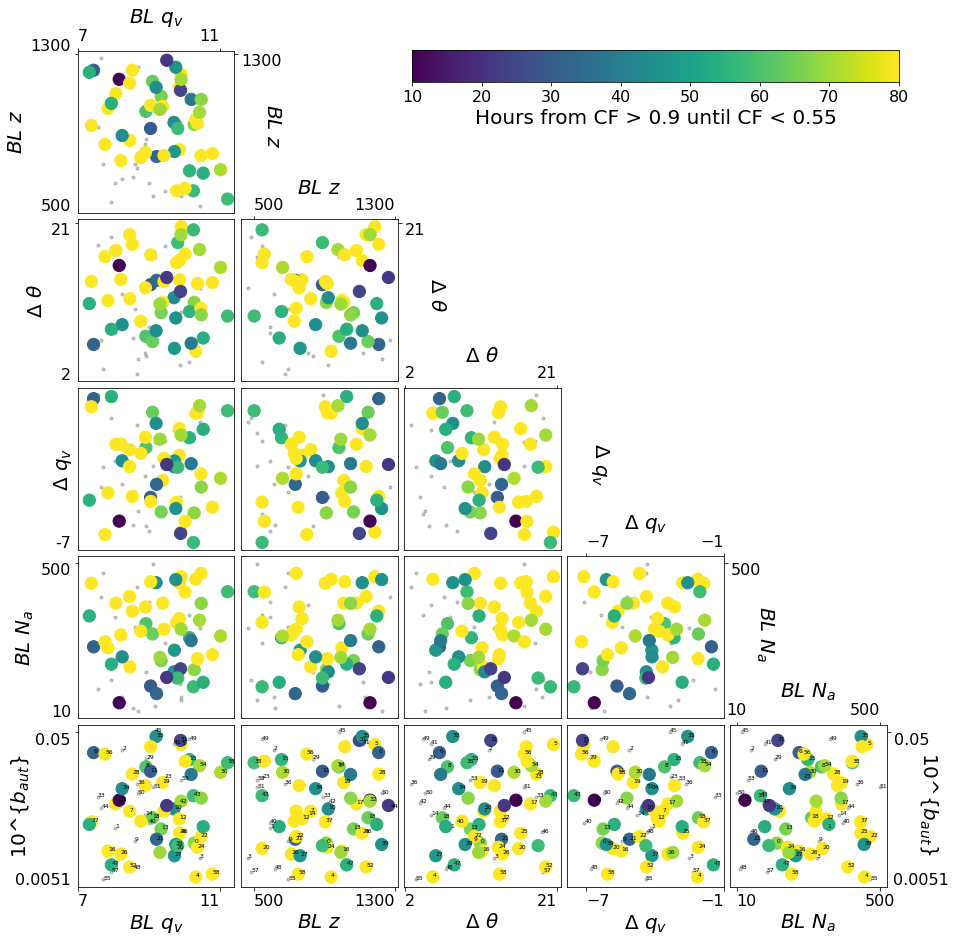

In [33]:
#region1, colour1, ind_keep, ind_discard1 = find_cf_region_time2(design, lambda x: any(t > 0.9 for t in x), 'em')  # take any simulation that goes above 0.8 CF at any point
#region2, colour2, ind_keep, ind_discard2 = find_cf_region_time2(design_val, lambda x: any(t > 0.9 for t in x), 'val')
#region = np.concatenate((region1,region2),axis=0)
#colour = np.concatenate((colour1,colour2),axis=0)
#region, colour, ind_keep, ind_discard1 = find_cf_region_time2(design, lambda x: any(t > 0.9 for t in x), 'em')

# values = 'spin'  # original or spin
# cut = 'intersect'  # full, valid, no80s, intersect
# show_design = 'all' # em, val or all
# region, design_em = select_cf_region(values, "sct_time", cut, show_design)
# print(len(region))

# c_obj = pairwise([region[:,:-1]], region[:,-1], plt.Normalize(10, 80), 'Hours from CF > 0.9 until CF < 0.55', annotate=False, highlight=None, lh_design=design_em)
post_spin="True"  # True or False
show_design="all"  # em, val, all
cut="valid"         # full, valid, no80s, intersect

if post_spin=='True':
    values='spin'
elif post_spin=='False':
    values='original'
    
full_time = np.loadtxt(f'/home/users/eers/sct/output_data/sct_all_confirmed_transition_time_post_spin_{post_spin}.csv', delimiter=',')
print(len(full_time))
full_time = np.delete(full_time, [3, 11, 25, 35, 64, 81, 84], axis=0)

if show_design=='em':
    full_time = full_time[:61]
elif show_design=='val':
    full_time = full_time[61:]
elif show_design=='all':
    full_time = full_time

if cut == 'full':
    region = full_time
elif cut == 'valid':
    region = full_time[np.argwhere(full_time[:,-1] > 0)[:,0]]
elif cut =='no80s':
    region = full_time[np.argwhere(full_time[:,-1] < 80)[:,0]]
elif cut == 'intersect':
    region = full_time[np.intersect1d(np.argwhere(full_time[:,-1] > 0)[:,0], np.argwhere(full_time[:,-1] < 80)[:,0])]
    
region2 = full_time[np.argwhere(full_time[:,-1] < 0)[:,0]]
    
#print(len(region[:,:-1]))
#design_em = np.loadtxt("/home/users/eers/sct/lh_design/SCT_EmulatorInputsDesign.csv", delimiter=',', skiprows=1)
design_em = np.loadtxt("/home/users/eers/sct/lh_design/post_spinupvalues/ppe_post_spinup.csv", delimiter=',')

#full_time[:,-1] = ssts

design_em = design_em[design_em[:,1] < 1500]
region = region[region[:,1] < 1500]
region2 = region2[region2[:,1] < 1500]

#design_em = design_em[design_em[:,-1] > 0]
#region = region[region[:,-1] > 0]

# time to transition 
c_obj = pairwise([region[:,:-1]], region[:,-1], 'viridis', plt.Normalize(10, 80), 'Hours from CF > 0.9 until CF < 0.55', annotate=True, highlight=None, 
                 lh_design=design_em)

#pairwise([region[:,:-1], region2[:,:-1]], 'viridis', plt.Normalize(10, 80), 'Hours from CF > 0.9 until CF < 0.55', annotate=False, highlight=None, 
#                 lh_design=design_em)

# SST 
#region = region[region[:,-1] > 0]
#c_obj = pairwise([region[:,:-1]], region[:,-1], 'cividis',plt.Normalize(293, 296), 'Initial SST', annotate=False, highlight=None, 
#                 lh_design=design_em)

#legend_elements = [mlines.Line2D([0], [0], marker='o', color='w', label=i, markerfacecolor=c, markersize=15) for i,c in zip(ind_keep, c_obj.get_facecolor())]
#plt.legend(handles = legend_elements)
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE)     # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
#plt.show()
sorter=2
#plt.savefig(f"/home/users/eers/sct/analysis_plots/pairwise_transition_time_post_spin_true_full_wSST_outliers.png",facecolor='white')

#plt.savefig(f"/home/users/eers/sct/analysis_plots/pairwise_initial_sst.png",facecolor='white')